<h1>ISEAFrame example</h1>

This notebook is a basic example of how to use the ISEAFrame executables in Google Colab.

First we have to get the simulation binaries and an XML with a battery model from Github:

In [9]:
%%script bash
wget -q https://github.com/ebarbers/iseaframe-notebooks/raw/master/iseaframe.zip -O iseaframe.zip
wget -q https://github.com/ebarbers/iseaframe-notebooks/raw/master/i3Cell.xml -O i3Cell.xml
unzip -o iseaframe.zip
rm iseaframe.zip

Archive:  iseaframe.zip
  inflating: iseaframe/libm.so.6     
  inflating: iseaframe/agingSimulation  
  inflating: iseaframe/thermalElectricalSimulation  
  inflating: iseaframe/libhdf5.so.200  
  inflating: iseaframe/electricalSimulation  
  inflating: iseaframe/libstdc++.so.6  
  inflating: iseaframe/libmatio.so.10  
  inflating: iseaframe/thermalSimulation  


To run the simulation, we need a current profile.
Positive current means that the battery is charged, negative current means that the battery is discharged.
The current stays constant until a new value is specified in the profile.
This means that we have to prepare the values a bit before plotting them to prevent pyplot from interpolating between them.

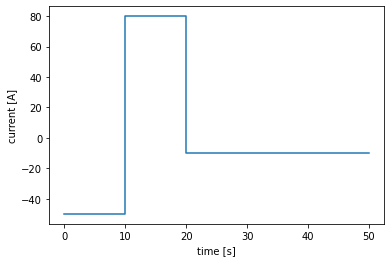

In [65]:
import matplotlib.pyplot as plt

time_values =    [ 0.0,  10.0, 20.0, 50.0]
current_values = [50.0, -80.0, 10.0, 10.0]

plotted_time_values = [None] * (2 * len(time_values) - 1)
plotted_time_values[::2] = time_values
plotted_time_values[1::2] = time_values[1:]

plotted_current_values = [None] * len(plotted_time_values)
plotted_current_values[::2] = current_values
plotted_current_values[1::2] = current_values[:-1]

plt.plot(plotted_time_values, plotted_current_values)
plt.xlabel("time [s]")
plt.ylabel("current [A]")
plt.show()

To use the current profile, we have to write it to a file in CSV format.

In [66]:
current_profile = zip(time_values, current_values)
with open('current.csv', 'w') as current_file:
  for (time, current) in current_profile:
    current_file.write("{}, {}\n".format(time, current))

Now we can run the simulation. This will take a few seconds.

In [69]:
%%script bash
mkdir -p simulation
cd simulation
../iseaframe/thermalElectricalSimulation -q ../i3Cell.xml ../current.csv

Run was succesful


The simulation results are written to a matlab file. We can read them into python arrays and plot the results.

Text(0, 0.5, 'SOC [%]')

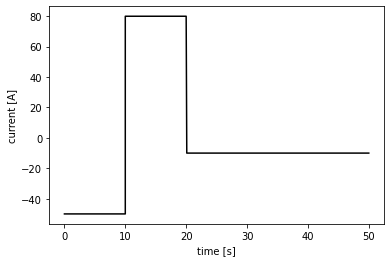

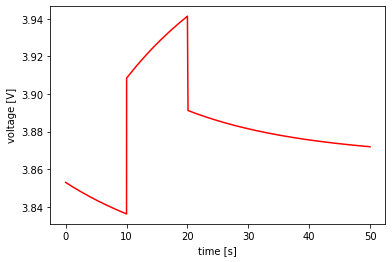

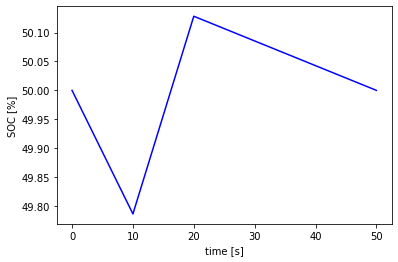

In [70]:
import scipy.io

mat_contents = scipy.io.loadmat('simulation/SampleOutput_0.mat')
time = mat_contents['diga']['daten'][0][0]['Programmdauer'][0][0][0]
current = mat_contents['diga']['daten'][0][0]['Strom'][0][0][0]
voltage = mat_contents['diga']['daten'][0][0]['Spannung'][0][0][0]
soc = mat_contents['diga']['daten'][0][0]['SOCVec'][0][0][0]

plt.figure()
plt.plot(time, current, 'k')
plt.xlabel("time [s]")
plt.ylabel("current [A]")

plt.figure()
plt.plot(time, voltage, 'r')
plt.xlabel("time [s]")
plt.ylabel("voltage [V]")

plt.figure()
plt.plot(time, soc, 'b')
plt.xlabel("time [s]")
plt.ylabel("SOC [%]")